### Область работы 1 (библиотеки)

In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

### Область работы 2 (выполнение лучшей модели)

In [2]:
path_train = 'train.csv'
path_test  = 'test.csv'

In [3]:
data_train = pd.read_csv(path_train)
data_test = pd.read_csv(path_test)

#замена вина качества от 7 на класс 1 и остального вина на класс 0
data_train['quality'] = (data_train['quality'] >= 7)*1

In [4]:
#исключение лишних признаков
mask = [1, 3, 4, 6, 7, 8, 10]

X = data_train.iloc[:,:-1].values[:,mask]
y = data_train.iloc[:,-1].values

data_test = data_test.iloc[:,mask].values

In [5]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 86, p = 6, weights = 'uniform'))
pipe.fit(X, y);

In [6]:
y_predict = np.where(pipe.predict_proba(data_test)[:,1] >= 0.744, 1, 0)

In [9]:
y_predict;

0.8333333333333334

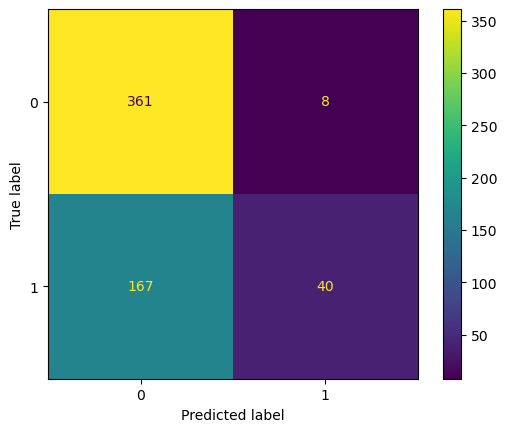

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score


y_true = np.where(pd.read_csv('test_Y_true.csv').values>=7,1,0)
matrix=confusion_matrix(y_true, y_predict)
ConfusionMatrixDisplay(matrix).plot();
precision_score(y_true, y_predict)